# house price prediction using linear regression

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset from CSV
df = pd.read_csv("D:\\Data_house.csv")

In [3]:
# Let's take a quick look at the first few rows of the dataset
print(df.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [4]:
# Summary statistics of the dataset
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  2.729000e+03  2729.000000  2729.000000   2729.000000  2.729000e+03   
mean   5.517550e+05     3.386955     2.148223   2113.044705  1.481744e+04   
std    3.697580e+05     0.904408     0.780840    954.730774  3.846693e+04   
min    8.000000e+04     0.000000     0.000000    420.000000  6.810000e+02   
25%    3.319500e+05     3.000000     1.750000   1445.000000  5.000000e+03   
50%    4.700000e+05     3.000000     2.250000   1960.000000  7.500000e+03   
75%    6.550000e+05     4.000000     2.500000   2580.000000  1.080000e+04   
max    7.062500e+06     9.000000     8.000000  13540.000000  1.074218e+06   

           floors   waterfront         view    condition   sqft_above  \
count  2729.00000  2729.000000  2729.000000  2729.000000  2729.000000   
mean      1.50568     0.006229     0.239648     3.449249  1793.121656   
std       0.54378     0.078695     0.771864     0.677243   838.270234   
min       1.00

In [5]:
# Check for missing values
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         1
country          1
dtype: int64


In [6]:
#removing the column which containing null value
df.dropna(subset=['statezip','country'], inplace=True)


In [7]:
#check null value
print(df.isnull().sum().sum())

0


C:\Users\anudw\AppData\Local\Temp\ipykernel_12172\3392456031.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


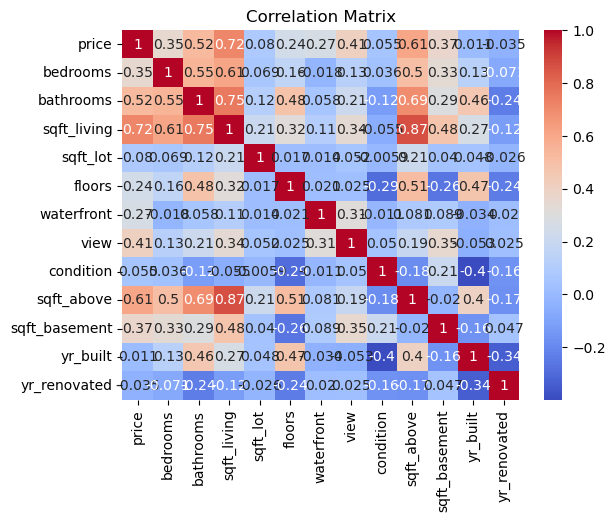

In [8]:
# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Preprocessing: Selecting features and target variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Model Evaluation
y_pred = model.predict(X_test)
print(y_pred)

y_test
model.score(X_test, y_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

[ 805498.38435117 1338586.02782316  529463.58956935  438955.62057457
  490480.90347225  683919.34779843  676121.8600389   245035.49441851
  979066.82502022  353624.64290499  657253.78441112 1131238.40960136
  279059.8950102   474134.45481702  928550.28652011  460126.09239044
  673850.46474659  578524.23506658  476051.98022595  308562.18861722
  703943.50646898  867452.60116034  922662.96041377  250923.86698664
  363296.82184909  478267.72062258  442202.18181121  444793.05395018
  443725.99887666  705386.87722458  321629.57607455  461679.24151429
  537124.33113806  297639.84618181  303133.42851007  650917.0597779
  533756.36579225  497606.14382032  813020.97579666  292019.2867638
  344392.59604044  845861.12938018  335492.46520094  430784.5807339
  574933.31519034  762922.11609599  434900.43195565  527622.26580031
  332231.90019302  454244.04741403  615772.84120967  412432.88507784
  538546.07213256  405305.52593765 1121236.41444833  388966.73830901
  765741.25932214  781028.64693657  5

0.5597309598965028

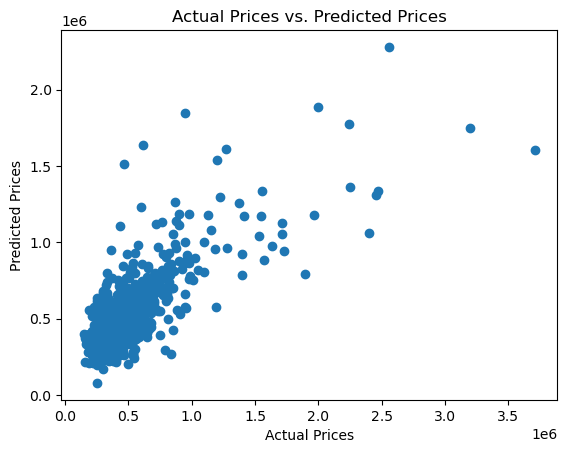

In [13]:
# Predictions and Visualization using scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


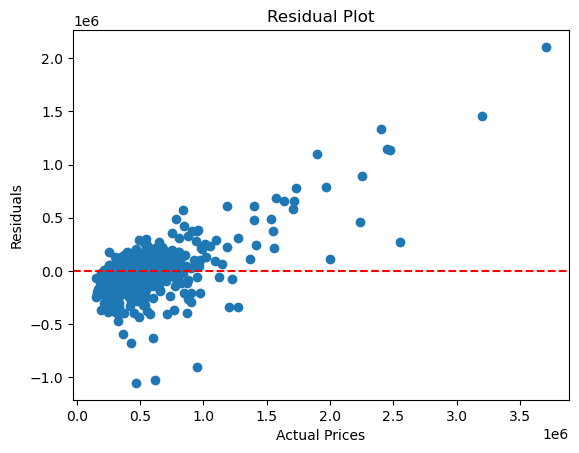

In [17]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [18]:
#use the trained model to make predictions on new data and visualize the results
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 342802.4187162211


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
